# Analyse Exploratoire des Données (EDA) - Bike Sharing

Ce notebook permet d'explorer les données agrégées de Capital Bikeshare pour comprendre les patterns de demande.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Ajout du dossier src au path
sys.path.append('../src')
from feature_engineering import add_temporal_features

sns.set_theme(style="whitegrid")
%matplotlib inline

## 1. Chargement des données

In [ ]:
df = pd.read_csv('../data/processed/bikeshare_aggregated.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = add_temporal_features(df)
df.head()

## 2. Visualisation de la demande globale

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['demand'])
plt.title("Demande Horaire de Vélos (2024-2025)")
plt.xlabel("Date")
plt.ylabel("Nombre de trajets")
plt.show()

## 3. Analyse des cycles (Heure et Jour)

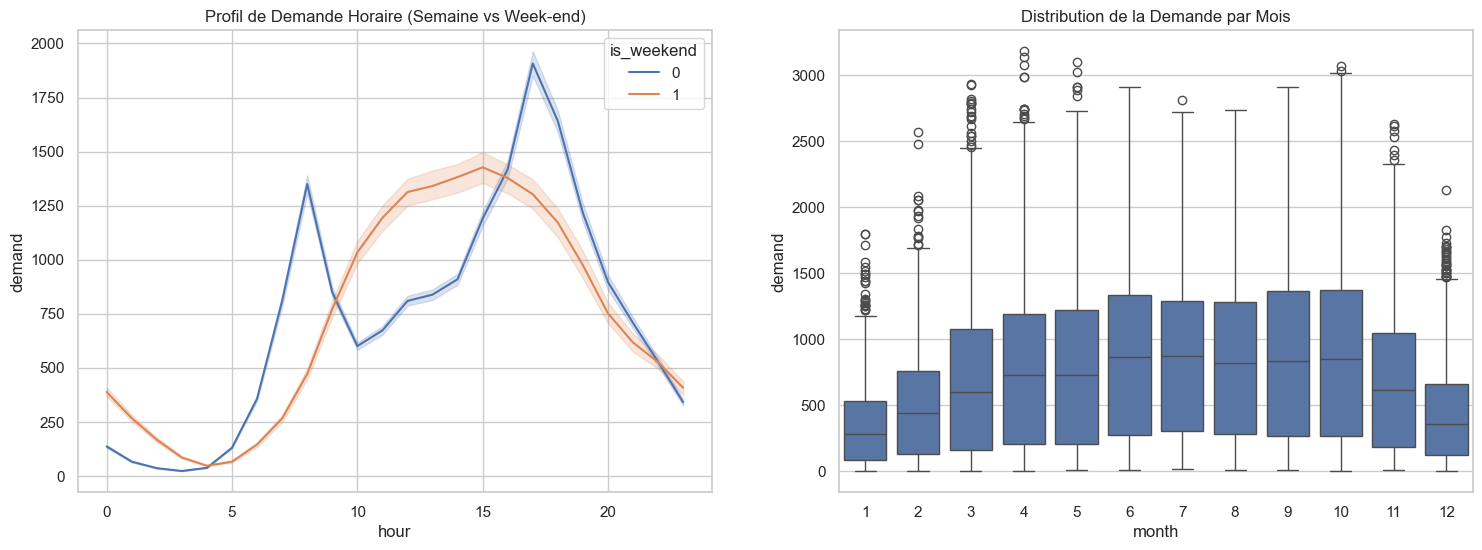

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Demande par heure (Moyenne)
sns.lineplot(data=df, x='hour', y='demand', hue='is_weekend', ax=axes[0])
axes[0].set_title("Profil de Demande Horaire (Semaine vs Week-end)")

# Demande par mois
sns.boxplot(data=df, x='month', y='demand', ax=axes[1])
axes[1].set_title("Distribution de la Demande par Mois")

plt.show()

## 4. Conclusions de l'Analyse

À l'issue de cette exploration, plusieurs points clés ressortent :

1. **Saisonnalité Horaire Marquée** : 
   - En semaine (**Weekdays**), on observe deux pics très nets correspondant aux trajets domicile-travail (rush hours : 8h et 17h-18h).
   - Le week-end (**Weekends**), la demande est plus diffuse et atteint son maximum en milieu de journée (loisirs).

2. **Saisonnalité Mensuelle** : 
   - La demande est nettement plus forte durant les mois tempérés et chauds (printemps à automne).
   - Une chute significative est visible en hiver, probablement liée aux conditions météorologiques.

3. **Impact des Lags** : 
   - La forte autocorrélation de la demande suggère que l'utilisation de **variables décalées** (demande à H-24 et H-168) sera cruciale pour le modèle prédictif (ce qui a été confirmé par les performances du modèle LightGBM).

**Justification du Cas d'Usage** : Ces patterns prévisibles confirment l'intérêt d'une prédiction à **J+2**. Savoir que lundi à 8h sera un pic permet de s'assurer que les stations clés sont pleines le dimanche soir.